# Exercise 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
from statistics import variance

## Part B

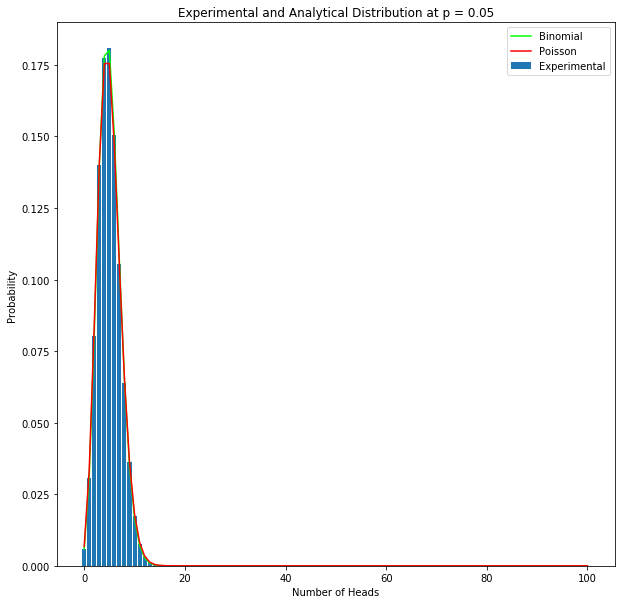

Binomial 0.18001782727
Poisson 0.175467369768


In [15]:
N = 100
M = 100000
p = 0.05

def Pvariable(N,M,p):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.randint(1/p,size=N)
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    prob = counts / M
    return prob

def Binomial(N,p):
    x = np.arange(N+1)
    binomial = (sps.factorial(N)*p**x*(1-p)**(N-x))/(sps.factorial(x)*sps.factorial(N-x))
    return binomial

def Poisson(N,p):
    x = np.arange(N+1)
    poisson = (N*p)**x*np.exp(-(N*p))/sps.factorial(x)
    return poisson

title = 'Experimental and Analytical Distribution at p = ' + str(p)
plt.figure(figsize=(10,10))
plt.bar(np.arange(N+1),Pvariable(N,M,p),label="Experimental")
plt.plot(np.arange(N+1),Binomial(N,p),color="lime",label="Binomial")
plt.plot(np.arange(N+1),Poisson(N,p),color="red",label="Poisson")
plt.title(title)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.legend()
plt.show()

print("Binomial",max(Binomial(N,p)))
print("Poisson",max(Poisson(N,p)))

# Part D

In [35]:
N = 100
M = 1000
p = 0.1

def Expectation(N,M,p):
    x = np.arange(N+1)
    expectation = sum(x * Pvariable(N,M,p))
    return expectation

def Variance(N,M,p):
    variance = (Expectation(N**2,M,p) - Expectation(N,M,p)**2)
    return variance

def ExpectationAnalytic(N,p):
    u = N * p
    return u

def VarianceAnalytic(N,p):
    variance = ExpectationAnalytic(N**2,p) - ExpectationAnalytic(N,p)**2
    return variance

print("Expectation:",Expectation(N,M,p))
print("Analytic:",ExpectationAnalytic(N,p))
print("Variance:",Variance(N,M,p))
print("Analytic:",VarianceAnalytic(N,p))

Expectation: 10.087
Analytic: 10.0
Variance: 900.458951
Analytic: 900.0
